## CMSC 197 Problem Set
### Implementing Linear Regression with Gradient Descent as Optimization Function

<i>Submitted by: Manejo, Kzlyr Shaira</i>

In [1]:
# import packages
import numpy as np
import pandas as pd

import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for splitting data into train and test sets
from sklearn.model_selection import train_test_split

# for finding r2
from sklearn.metrics import r2_score

# for finding ols
from sklearn.linear_model import LinearRegression

# for generateing plots
import matplotlib.pyplot as plt

import random

### 1. Load Advertising.csv dataset using pandas

In [2]:
data = pd.read_csv('data/Advertising.csv', encoding = 'latin-1')

In [3]:
# removing  the unnamed:0 column
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 2. Standardizing each column of the dataset

In [4]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data = pd.DataFrame(standardized_data, columns=['TV', 'Radio', 'Newspaper', 'Sales'])
standardized_data.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


### 3. Adding an extra column for bias

In [5]:
standardized_data.insert(0, 'Bias', 1)
standardized_data

,Bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [6]:
# idefining the x and y
x = standardized_data.drop(columns=['Sales'])
y = standardized_data['Sales']

### 4. Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.

In [7]:
#splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.85, test_size=0.15)

print("x_train:", x_train.shape)
print("x_test", x_test.shape)
print("y_train:", x_train.shape)
print("y_test", x_test.shape)

x_train: (170, 4)
x_test (30, 4)
y_train: (170, 4)
y_test (30, 4)


### 5. Fitting the model on the training set

In [8]:
def initialize_weights():
    return np.zeros(4)

In [9]:
# Return predicted values for given inputs X and weights.
def predict(x, weights):
    return np.dot(x, weights)

In [10]:
#Compute the mean squared error cost.
def compute_cost(y, prediction):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((prediction - y) ** 2)
    return cost

In [11]:
#Compute the gradient of the cost function.
def compute_gradient(x, y, weights):
    m = len(y)
    prediction = predict (x, weights)
    error = prediction - y
    gradients = (1 / m) * np.dot(x.T, error)
    return gradients

In [12]:
def update_weights(weights, learning_rate, gradient):
    updated_weights = weights - learning_rate * gradient
    return updated_weights

In [13]:
#Perform gradient descent
def grad_descent(x, y, learning_rate, num_iterations):
    weights_matrix = initialize_weights()
    costs_matrix = []

    for i in range(num_iterations):
        predictions = predict(x, weights_matrix)
        cost = compute_cost(y, predictions)
        costs_matrix.append(cost)

        gradients = compute_gradient(x, y, weights_matrix)
        weights_matrix = update_weights(weights_matrix, gradients, learning_rate)

    return weights_matrix, costs_matrix

In [14]:
#Plot the cost as a function of iteration.
def plot_costs(costs):
    plt.figure(figsize=(15, 4))
    plt.plot(costs)
    plt.title("Cost over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

In [15]:
# defining learning rate and number of iterations
learning_rate = 0.01
iteration_value = 500

In [16]:
# Run gradient descent
final_weights, costs = grad_descent(x_train, y_train, learning_rate, iteration_value)
costs_df = pd.DataFrame(costs)

# final_weights
print("Final weights:", final_weights)
print("Bias: ", final_weights[0])
print("TV: ", final_weights[1])
print("Radio: ", final_weights[2])
print("Newspaper: ", final_weights[3])

Final weights: [ 0.00659138  0.71131187  0.54731944 -0.00808678]
Bias:  0.006591381183889727
TV:  0.7113118718889876
Radio:  0.5473194394307835
Newspaper:  -0.008086783061536044


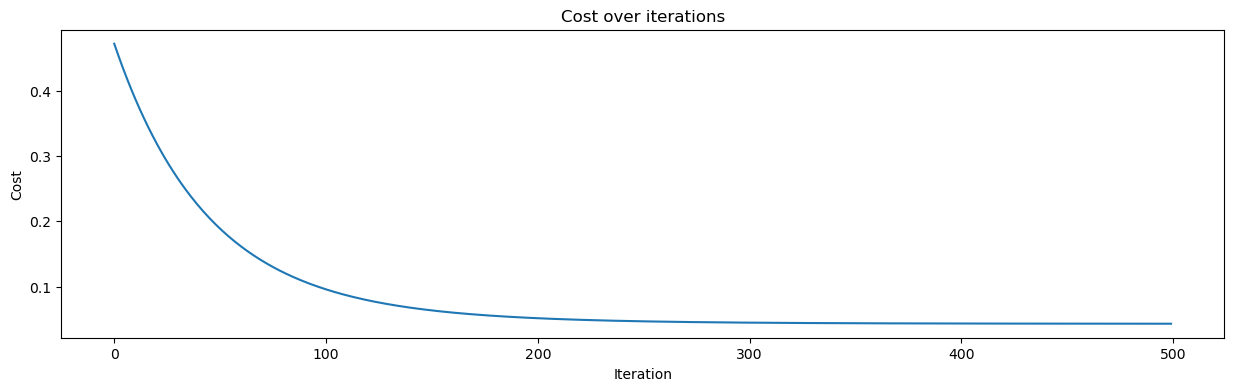

In [17]:
plot_costs(costs)

### 6. Predict the quantitative response y on the train set.

In [18]:
# Predict and calculate cost for the train set
train_predictions = predict(x_train, final_weights)
train_mse = compute_cost(y_train, train_predictions)
print("Train Set MSE:", train_mse)

train_comparison_df = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})

print("\nTrain Set Predictions:")
train_comparison_df.head()

Train Set MSE: 0.04297819643950042

Train Set Predictions:


,Actual,Predicted
135,-0.465472,0.071866
29,-0.676832,-0.900602
25,-0.388614,0.242590
26,0.187822,0.201940
93,1.571268,1.342844


### 7. Predict and calculate cost for the test set

In [19]:
# Predict and calculate cost for the train set
test_predictions = predict(x_test, final_weights)
test_mse = compute_cost(y_test, test_predictions)
print("Test Set MSE:", test_mse)

test_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

print("\nTest Set Predictions:")
test_comparison_df.head()

Test Set MSE: 0.1052805869352084

Test Set Predictions:


,Actual,Predicted
174,-0.484686,-0.095112
33,0.648971,0.881953
173,-0.446257,-0.406779
186,-0.715261,-0.836741
22,-1.618343,-1.384332


### 8. Revert back to orginal scale 

In [20]:
# Add a new column which is the predicted sales
predicted_sales = predict(standardized_data[['Bias', 'TV', 'Radio', 'Newspaper']], final_weights)

# Use the original mean and std for reverting predictions
sales_mean = data['Sales'].mean()
sales_std = data['Sales'].std()

# Revert predicted sales to original scale
reverted_predicted_sales = predicted_sales * sales_std + sales_mean

# Prepare the DataFrame for comparison
standardized_data = standardized_data.drop(columns = ['Bias'])
reverted_df = scaler.inverse_transform(standardized_data)
reverted_df = pd.DataFrame(reverted_df, columns=['TV', 'Radio', 'Newspaper', 'Sales'])
reverted_df['Predicted Sales'] = reverted_predicted_sales

#Insert Residuals column
reverted_df['Residuals'] = reverted_df['Sales'] - reverted_df['Predicted Sales']

# Display the final DataFrame
reverted_df

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.1,37.8,69.2,22.1,20.384036,1.715964
1,44.5,39.3,45.1,10.4,12.676973,-2.276973
2,17.2,45.9,69.3,9.3,12.719528,-3.419528
3,151.5,41.3,58.5,18.5,17.673508,0.826492
4,180.8,10.8,58.4,12.9,13.062387,-0.162387
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.600310,1.999690
196,94.2,4.9,8.1,9.7,8.269564,1.430436
197,177.0,9.3,6.4,12.8,12.709474,0.090526
198,283.6,42.0,66.2,25.5,23.518171,1.981829


## Questions

### 1. What are the optimal weights found by your implemented gradient descent? 

In [21]:
print("The optimal weights are:",  final_weights)

print(f"hΘ(x) = {final_weights[0]} + {final_weights[1]}*TV + {final_weights[2]}*Radio + {final_weights[3]}*Newspaper")

The optimal weights are: [ 0.00659138  0.71131187  0.54731944 -0.00808678]
hΘ(x) = 0.006591381183889727 + 0.7113118718889876*TV + 0.5473194394307835*Radio + -0.008086783061536044*Newspaper


### 2. Provide a scatter plot of the y_hat and y for both the train and test seet. Is there a trend? Provide an r2 score.

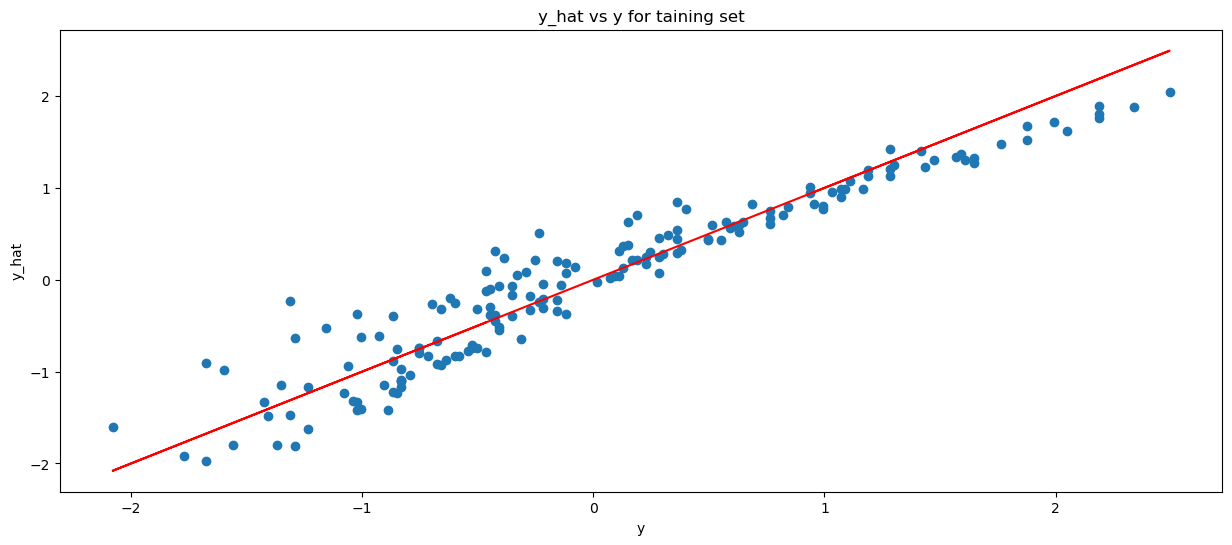

In [34]:
# Scatter plot of actual and predicted y values 
prediction_train = predict(x_train, final_weights)
plt.figure(figsize=(15, 6))
plt.scatter(y_train, prediction_train)
plt.xlabel('y')
plt.ylabel('y_hat')
plt.title('y_hat vs y for taining set')
plt.plot(y_train, y_train, color='red')
plt.show()

In [23]:
#r2 score of the train set
r2_train = r2_score(y_train, prediction_train)
print("The r2 score is ", r2_train)

The r2 score is  0.9090111358500259


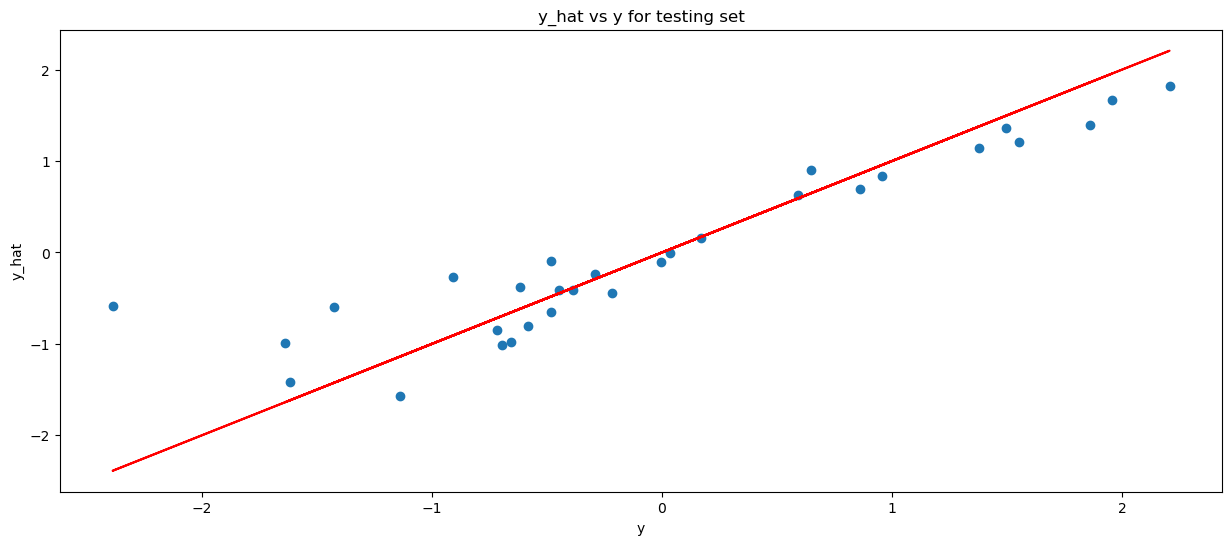

In [35]:
# Scatter plot of actual and predicted y values 
prediction_test = predict(x_test, final_weights)
plt.figure(figsize=(15, 6))
plt.scatter(y_test, prediction_test)
plt.xlabel('y')
plt.ylabel('y_hat')
plt.title('y_hat vs y for testing set')
plt.plot(y_test, y_test, color='red')
plt.show()

In [25]:
#r2 score of the test set
r2_test = r2_score(y_test, prediction_test)
print("The r2 score of test set is ", r2_test)

The r2 score of test set is  0.8395263718413619


### 3. What happens to the error, r2, and cost as the number of iterations increase?

In [26]:
# function to calculate R²
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

# modified grad_descent function to get R2 values
def grad_descent_with_r2(x, y, learning_rate, num_iterations):
    weights_matrix = initialize_weights()
    costs_matrix = []
    r2_values = []

    for i in range(num_iterations):
        predictions = predict(x, weights_matrix)
        cost = compute_cost(y, predictions)
        costs_matrix.append(cost)
        
        # Calculate R² and store it
        r2 = calculate_r2(y, predictions)
        r2_values.append(r2)

        gradients = compute_gradient(x, y, weights_matrix)
        weights_matrix = update_weights(weights_matrix, learning_rate, gradients)

    return weights_matrix, costs_matrix, r2_values

# Run gradient descent with R² calculations
final_weights, costs, r2_values = grad_descent_with_r2(x_train, y_train, learning_rate, 5000)

plt.subplot(1, 2, 2)
plt.plot(r2_values)
plt.title("R² over iterations")
plt.xlabel("Iteration")
plt.ylabel("R²")
plt.show()

# Output final weights, cost, and R²
print("Final weights:", final_weights)
print("Final cost:", costs[-1])
print("Final R²:", r2_values[-1])

Final weights: [ 0.00494629  0.71711769  0.55754737 -0.02140822]
Final cost: 0.04287290130692874
Final R²: 0.909234055500149


<function matplotlib.pyplot.show(close=None, block=None)>

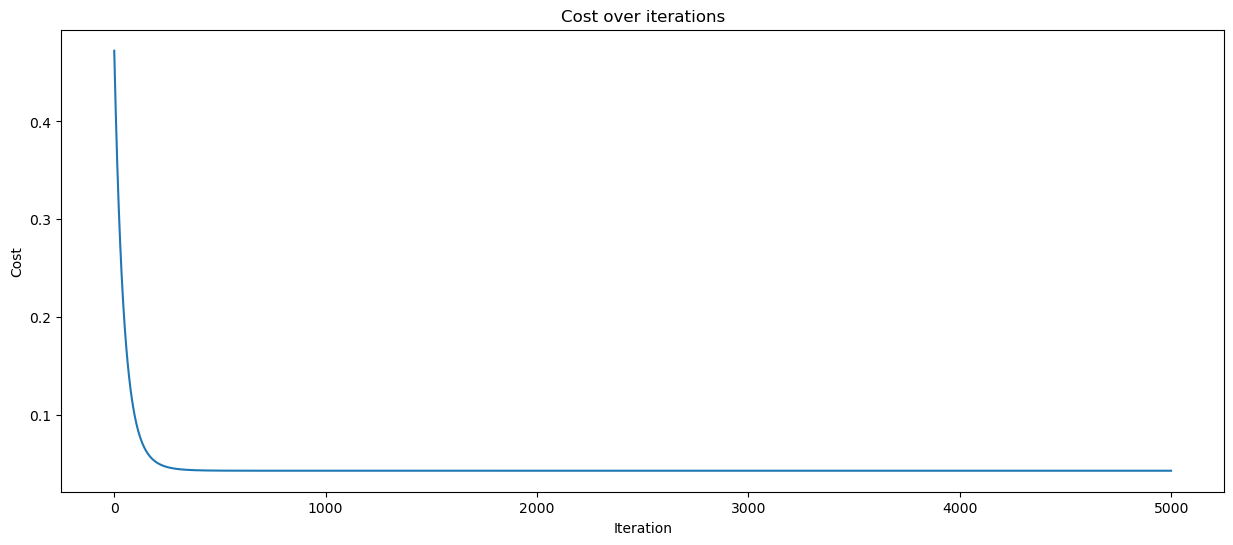

In [27]:
# Plotting costs
plt.figure(figsize=(15, 6))
plt.plot(costs)
plt.title("Cost over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show

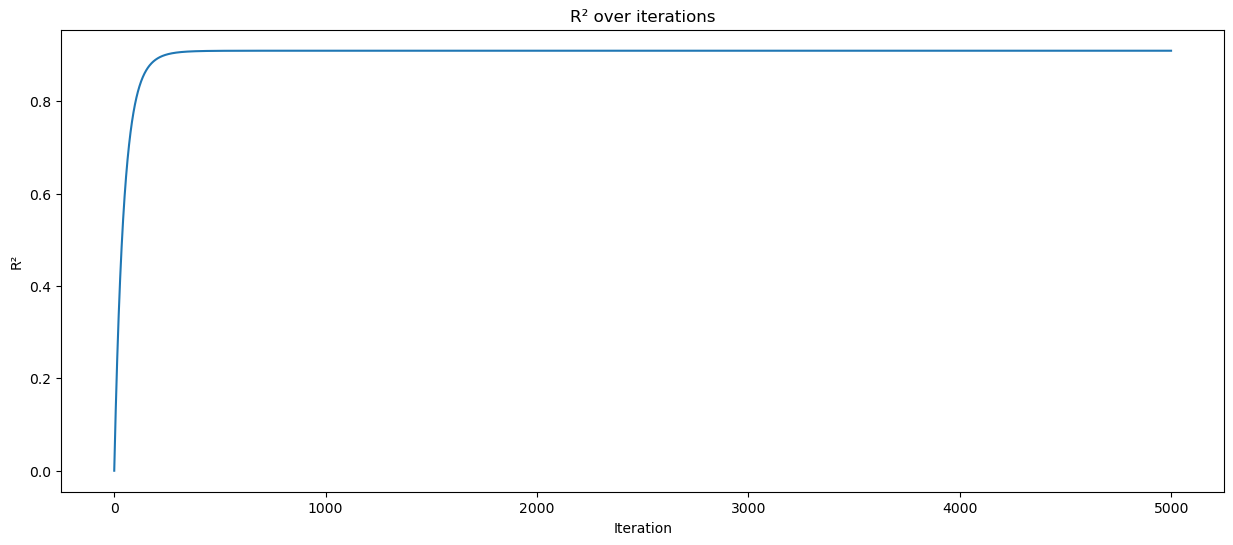

In [28]:
# Plotting r2 vaues
plt.figure(figsize=(15, 6))
plt.plot(r2_values)
plt.title("R² over iterations")
plt.xlabel("Iteration")
plt.ylabel("R²")
plt.show()

As we can see from the plots, the cost value decreases as the number of iterations increases, indicating that the model's predictions are getting closer to the actual values. On the otherhand, the r2 value increases as the number of iterations increases. This implies that the model explains a larger portion of the variance in the target variable. However, as we can observe from the plots, the difference with 1000 and 5000 iterations is very minor. Hence, we can say that 1000 iterations is more than enough.

### 4. Checking the effect on the cost and error as learning rate changes. Learning rates used here include 0.2, 0.1, 0.01, 0.001, 0.0001.

In [29]:
# List of learning rates to try
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001]

# Initialize a dictionary to store weights and costs
results = {}

# Run gradient descent for each learning rate
for lr in learning_rates:
    weights, costs = grad_descent(x_train, y_train, lr, 400)
    results[lr] = {'weights': weights, 'costs': costs}

# Initialize a dictionary to store costs DataFrames
cost_dfs = {lr: pd.DataFrame(data['costs'], columns=['Cost']) for lr, data in results.items()}

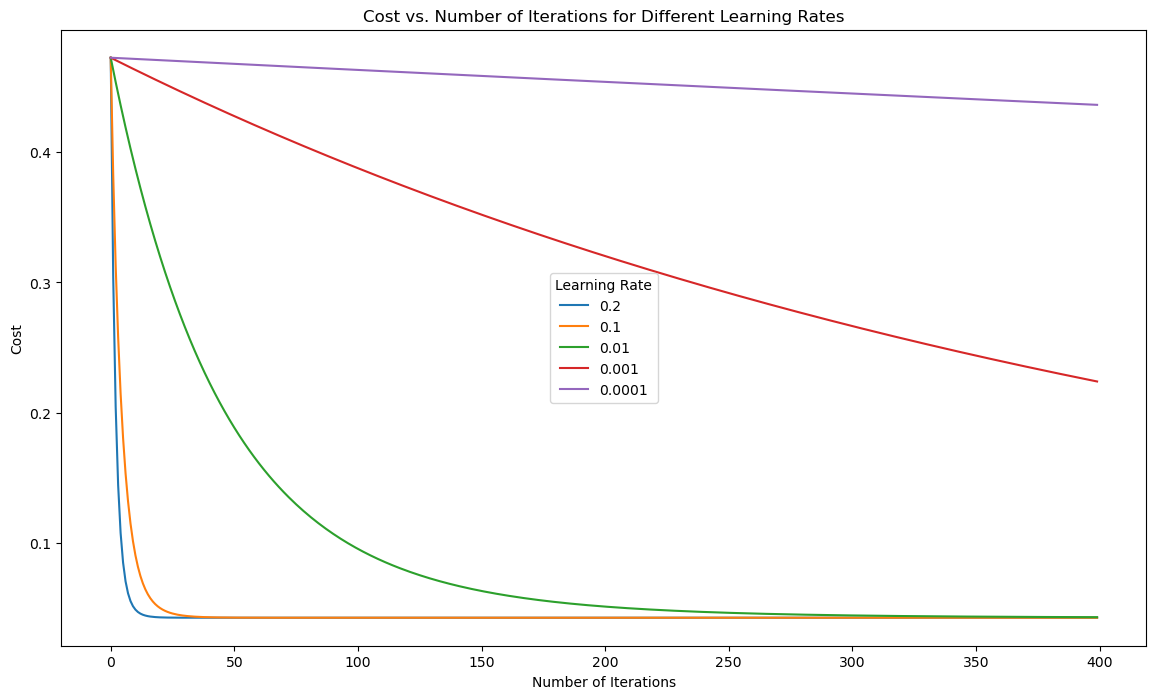

In [30]:
# Concatenate all costs into one DataFrame
df_costs = pd.concat(cost_dfs.values(), axis=1)
df_costs.columns = [str(lr) for lr in learning_rates]  # Assign learning rates as columns

# Reset index to get a simple range index
df_costs.reset_index(drop=False, inplace=True)

# Define dimensions for the plot
fig, ax = plt.subplots(figsize=(14, 8))
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

# Melt the DataFrame for seaborn
melted_df = df_costs.melt(id_vars='index', var_name='Learning Rate', value_name='Cost')

# Call lineplot of seaborn
sns.lineplot(data=melted_df, x='index', y='Cost', hue='Learning Rate', ax=ax)
plt.title("Cost vs. Number of Iterations for Different Learning Rates")
plt.show()

As we can observe from the figure above, when the learning rate is too small, such as 0.0001 or 0.001, the cost remains high and decreases very slowly. This indicates that the model is making minimal progress toward minimizing the cost, which can lead to long training times. On the other hand, when the learning rate is high, like 0.1 or 0.2, the cost function shows significant fluctuations, often overshooting the minimum and leading to instability. 

### 5. Is there a relationship on the learning rate and the number of iterations?

With higher learning rate, finding the minimum cost may require less number of iterations but it may also cause the algorithm to overshoot the minimum cost when the iteration is higher than the optimal. On the otherhand a lower learning rate provides more precise updates on the minimum cost but it requires more iterations, taking too much time and requiring more resources.

Therefore, it is important to find the balance between the learning rate and number of iterations for efficient model training.

### 6. Compare the results with the results of ordinary least squares function.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the OLS model
ols_model = LinearRegression()
ols_model.fit(x_train, y_train)

# Get predictions for both training and testing sets
ols_predictions_train = ols_model.predict(x_train)
ols_predictions_test = ols_model.predict(x_test)

# Calculate R² scores
ols_r2_train = r2_score(y_train, ols_predictions_train)
ols_r2_test = r2_score(y_test, ols_predictions_test)

# Get the OLS weights
ols_weights = np.insert(ols_model.coef_, 0, ols_model.intercept_)

In [32]:
print("Gradient Descent Final Weights:", final_weights)
print("OLS Weights:", ols_weights)
print("\n")

print("Gradient Descent R2 score (train):", r2_train)
print("Gradient Descent R2 score (test):", r2_test)
print("\n")

print("OLS R2 score (train):", ols_r2_train)
print("OLS R2 score (test):", ols_r2_test)

Gradient Descent Final Weights: [ 0.00494629  0.71711769  0.55754737 -0.02140822]
OLS Weights: [ 0.00494629  0.          0.71711769  0.55754737 -0.02140822]


Gradient Descent R2 score (train): 0.9090111358500259
Gradient Descent R2 score (test): 0.8395263718413619


OLS R2 score (train): 0.909234055500149
OLS R2 score (test): 0.8389920333189634


Since the r2 score of gradient descent is slightly higher compared to the r2 score of OLS function, hence we can say that the gradient descent performed better.